# **Import Libraries**

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as snsw

In [28]:
housing = pd.read_csv('Boston House Price Data.csv')
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [29]:
housing.isnull().sum()

,0
CRIM,0
ZN,0
INDUS,0
CHAS,0
NOX,0
RM,0
AGE,0
DIS,0
RAD,0
TAX,0


No Missing Vals, hence skipping EDA and going ahead with train-test split

# **Train-Test Split**

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = housing.drop('PRICE', axis=1)
y = housing['PRICE']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **Scaling Data**
*Without scaling neural networks perform bad.*

In [31]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# **Build a Neural Network**

In [32]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential([
    Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(16, activation='relu'),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# **Train The Model**

In [33]:
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 566.0444 - mae: 21.8921 - val_loss: 524.6260 - val_mae: 21.3777
Epoch 2/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 615.3216 - mae: 22.7002 - val_loss: 504.3887 - val_mae: 20.9014
Epoch 3/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 555.4054 - mae: 21.5773 - val_loss: 481.9885 - val_mae: 20.3599
Epoch 4/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 542.1965 - mae: 21.0731 - val_loss: 455.6614 - val_mae: 19.7107
Epoch 5/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 506.2333 - mae: 20.5431 - val_loss: 426.1080 - val_mae: 18.9667
Epoch 6/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 450.6771 - mae: 19.1966 - val_loss: 394.0959 - val_mae: 18.1383
Epoch 7/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 420.5543 - mae: 18.3768 - val_loss: 360.2562 - val_mae: 17.2124
Epoch 8/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 383.7134 - mae: 17.5382 - val_loss: 324.1880 - val_mae: 16.1861
Epoch 9/100
11/

# **Model Evaluation**

In [34]:
test_loss, test_mae = model.evaluate(X_test, y_test)
final_predictions = model.predict(X_test)
print(f'Test Loss: {test_loss:.4f}')
print(f'Test MAE: {test_mae}')

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 12.2323 - mae: 2.4554
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Test Loss: 16.1075
Test MAE: 2.604231834411621


# **Save The Model**

In [35]:
model.save('housing_price_nn.h5')

# **Plot the Losses**

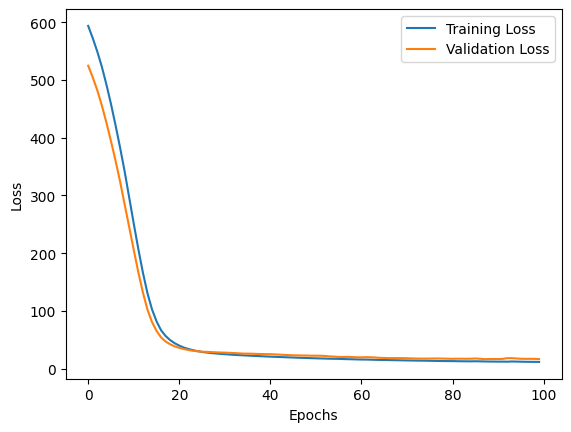

In [36]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# **Predictions v/s. Actual Prices**

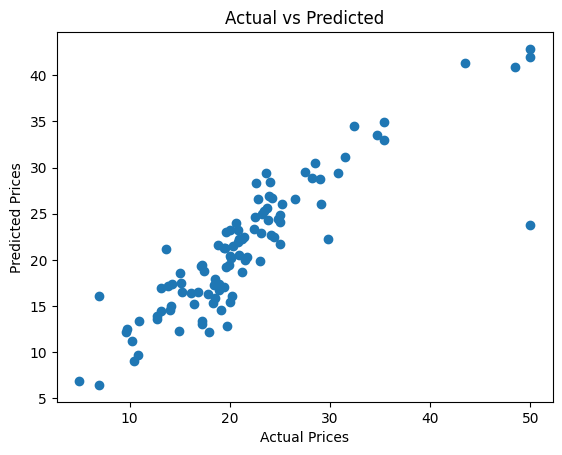

In [37]:
plt.scatter(y_test, final_predictions)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted")
plt.show()

**Summary / Why I Did What**
- Used train/validation/test split to fairly evaluate model performance and avoid data leakage.
- Built a pipeline with SimpleImputer and StandardScaler to handle missing values and scale features (essential for neural networks).
- Chose a small neural network (32 → 16 → 1) because the dataset is small (506 samples) → prevents overfitting.
- Used mean squared error (MSE) as loss and mean absolute error (MAE) as metric for regression evaluation.
- Trained for 100 epochs and monitored validation metrics to ensure the network is learning and not overfitting.
- Observed that validation MAE closely matches test MAE → model generalizes reasonably well.
- Neural nets offer practice with deep learning, even if tree-based models often perform better on small tabular datasets.